# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Remove predictors with p-values too high and refit the model
* Examine and interpret the model results
* Split data into training and testing sets
* Fit a regression model to the data set using statsmodel library


## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)" then you need to further preprocess your column names.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Lego_dataset_cleaned.csv')
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [3]:
subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

In [4]:
df.columns = [col_formatting(col) for col in df.columns]

In [5]:
list(df.columns)

['piece_count',
 'list_price',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10plus',
 'ages_10_14',
 'ages_10_16',
 'ages_10_21',
 'ages_11_16',
 'ages_12plus',
 'ages_12_16',
 'ages_14plus',
 'ages_16plus',
 'ages_1half_3',
 'ages_1half_5',
 'ages_2_5',
 'ages_4plus',
 'ages_4_7',
 'ages_4_99',
 'ages_5plus',
 'ages_5_12',
 'ages_5_8',
 'ages_6plus',
 'ages_6_12',
 'ages_6_14',
 'ages_7plus',
 'ages_7_12',
 'ages_7_14',
 'ages_8plus',
 'ages_8_12',
 'ages_8_14',
 'ages_9plus',
 'ages_9_12',
 'ages_9_14',
 'ages_9_16',
 'theme_name_Angry_Birds',
 'theme_name_Architecture',
 'theme_name_BOOST',
 'theme_name_Blues_Helicopter_Pursuit',
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus_Gyrosphere_Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator_3_in_1',
 'theme_name_Creator_Expert',
 'theme_name_DC_Comics_Super_Heroes',
 'theme_name_DC_Super_Hero_Girls',
 'theme_name_DIMENSIONS',
 'theme_name_DUPLO',
 'theme_name_Dilophosaurus_Out

In [6]:
#Defining the problem
outcome = 'list_price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [7]:
train, test = train_test_split(df)

In [8]:
print(len(train), len(test))
train.head()

8152 2718


,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
990,-0.463104,15.1924,-0.286801,0.216064,0.161581,0.117830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3112,-0.479947,30.4980,-0.398512,-1.526621,-1.082024,-1.169744,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3746,-0.339188,52.7520,-0.398512,0.216064,0.990651,0.439724,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10340,-0.153916,66.6971,-0.063378,-0.655279,-2.118362,-1.491638,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
447,-0.493181,9.9900,-0.175090,0.041796,-0.252954,0.600671,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [9]:
test.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
699,-0.455886,19.9900,-0.230945,0.564601,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
9689,-0.009548,63.8929,0.187972,-1.352353,-2.532897,-2.457318,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
5225,0.126398,97.5878,-0.286801,0.216064,0.161581,0.117830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2087,0.002483,54.8878,-0.370585,1.087407,0.990651,1.244458,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5285,5.249055,365.9878,2.003281,0.738870,0.783383,0.922564,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [10]:
#Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     548.4
Date:                Tue, 16 Jul 2019   Prob (F-statistic):               0.00
Time:                        20:41:34   Log-Likelihood:                -40519.
No. Observations:                8152   AIC:                         8.123e+04
Df Residuals:                    8057   BIC:                         8.189e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.8111      1.903     33.527      0.000      60.080      67.542
piece_count                                         76.2821      0.895     85.259      0.000      74.528      78.036
num_reviews                                          5.6805      0.669      8.491      0.000       4.369       6.992
play_star_rating                                     5.3309      0.625      8.535      0.000       4.106       6.555
star_rating                                         -1.4465      0.708     -2.043      0.041      -2.835      -0.058
val_star_rating                                     -8.9039      0.637    -13.980      0.000     -10.152      -7.655
ages_10plus                                        117.6913      6.757     17.418      0.000     104.446     130.936
ages_10_14                                         -23.8174      9.837     -2.421      0.015     -43.100      -4.534
ages_10_16                                         -11.5292      4.158     -2.773      0.006     -19.679      -3.379
ages_10_21                                          60.4004      7.626      7.920      0.000      45.452      75.349
ages_11_16                                         -22.3924      5.767     -3.883      0.000     -33.698     -11.087
ages_12plus                                         71.2316      5.544     12.847      0.000      60.363      82.100
ages_12_16                                         -58.8072      6.722     -8.748      0.000     -71.984     -45.630
ages_14plus                                         24.9741      4.214      5.927      0.000      16.715      33.234
ages_16plus                                         35.0486      6.082      5.762      0.000      23.126      46.972
ages_1half_3                                        -8.9854      2.428     -3.701      0.000     -13.744      -4.227
ages_1half_5                                        -4.2034      2.960     -1.420      0.156     -10.006       1.599
ages_2_5                                            15.6567      1.683      9.304      0.000      12.358      18.955
ages_4plus                                         -16.0378      6.671     -2.404      0.016     -29.115      -2.961
ages_4_7                                            -5.9154      3.437     -1.721      0.085     -12.653       0.822
ages_4_99                                           -3.5606      3.781     -0.942      0.346     -10.973       3.852
ages_5plus                                          -8.8411      3.290     -2.687      0.007     -15.290      -2.392
ages_5_12                                          -32.2788      3.261     -9.897      0.000     -38.672     -25.886
ages_5_8                                 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [11]:
#Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|']<0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

103 73
['piece_count', 'num_reviews', 'play_star_rating', 'star_rating', 'val_star_rating']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,63.8111,1.903,33.527,0.000,60.080,67.542
piece_count,76.2821,0.895,85.259,0.000,74.528,78.036
num_reviews,5.6805,0.669,8.491,0.000,4.369,6.992
play_star_rating,5.3309,0.625,8.535,0.000,4.106,6.555
star_rating,-1.4465,0.708,-2.043,0.041,-2.835,-0.058


> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [ ]:
#Your code here

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extend of this problem.

In [12]:
#Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|']<0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

103 73
['piece_count', 'num_reviews', 'play_star_rating', 'star_rating', 'val_star_rating']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,63.8111,1.903,33.527,0.000,60.080,67.542
piece_count,76.2821,0.895,85.259,0.000,74.528,78.036
num_reviews,5.6805,0.669,8.491,0.000,4.369,6.992
play_star_rating,5.3309,0.625,8.535,0.000,4.106,6.555
star_rating,-1.4465,0.708,-2.043,0.041,-2.835,-0.058


In [14]:
#Your code here
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

/opt/conda/envs/learn-env/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('piece_count', 4.739320111011578),
 ('num_reviews', 2.9562408068145802),
 ('play_star_rating', 2.4642811875049997),
 ('star_rating', 3.2079374936121354),
 ('val_star_rating', 2.4198220562784436),
 ('ages_10plus', 17.923882902203164),
 ('ages_10_14', 1.1040007977509871),
 ('ages_10_16', 1.2002053579720535),
 ('ages_10_21', 7.194975559331257),
 ('ages_11_16', 1.1741617155010287),
 ('ages_12plus', 7.311853110381442),
 ('ages_12_16', 1.2145163075303922),
 ('ages_14plus', 2.322162827705674),
 ('ages_16plus', 9.894514863314827),
 ('ages_1half_3', 1.0726963544119619),
 ('ages_2_5', 1.2698179335707513),
 ('ages_4plus', 1.2064164728000237),
 ('ages_5plus', inf),
 ('ages_5_12', 3.3229144394168655),
 ('ages_6plus', 2.6817006188894648),
 ('ages_6_12', 2.0847096786235815),
 ('ages_7_12', 1.560782271971502),
 ('ages_7_14', 2.058963967476408),
 ('ages_8plus', 3.351459183280254),
 ('ages_8_12', 1.314411514458454),
 ('ages_8_14', 2.138244102911083),
 ('ages_9plus', 1.5649995089216653),
 ('ages_9_12',

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [15]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

73 64


In [13]:
#Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     716.4
Date:                Tue, 16 Jul 2019   Prob (F-statistic):               0.00
Time:                        20:44:26   Log-Likelihood:                -40527.
No. Observations:                8152   AIC:                         8.120e+04
Df Residuals:                    8079   BIC:                         8.171e+04
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.1488      1.563     40.397      0.000      60.085      66.213
piece_count                                         76.3484      0.880     86.744      0.000      74.623      78.074
num_reviews                                          5.7991      0.663      8.750      0.000       4.500       7.098
play_star_rating                                     5.4660      0.611      8.948      0.000       4.269       6.663
star_rating                                         -1.4020      0.691     -2.030      0.042      -2.756      -0.048
val_star_rating                                     -8.8570      0.605    -14.639      0.000     -10.043      -7.671
ages_10plus                                        124.6957      7.561     16.492      0.000     109.874     139.517
ages_10_14                                         -18.6063     10.180     -1.828      0.068     -38.562       1.349
ages_10_16                                          -7.1081      3.888     -1.828      0.068     -14.729       0.513
ages_10_21                                          67.4880      8.266      8.165      0.000      51.284      83.691
ages_11_16                                         -18.3589      5.524     -3.324      0.001     -29.187      -7.531
ages_12plus                                         76.9487      6.434     11.960      0.000      64.337      89.561
ages_12_16                                         -54.1598      7.022     -7.713      0.000     -67.925     -40.394
ages_14plus                                         30.0367      4.804      6.253      0.000      20.620      39.453
ages_16plus                                         39.5393      6.813      5.804      0.000      26.185      52.894
ages_1half_3                                        -1.9378      3.128     -0.619      0.536      -8.070       4.194
ages_2_5                                            22.4101      1.979     11.325      0.000      18.531      26.289
ages_4plus                                         -14.1453     10.191     -1.388      0.165     -34.122       5.832
ages_5plus                                          -7.4475      3.225     -2.309      0.021     -13.770      -1.125
ages_5_12                                          -26.5216      2.688     -9.867      0.000     -31.790     -21.253
ages_6plus                                         -20.1244      5.573     -3.611      0.000     -31.048      -9.200
ages_6_12                                          -15.9438      1.896     -8.409      0.000     -19.660     -12.227
ages_7_12                                          -15.3820      2.203     -6.983      0.000     -19.700     -11.064
ages_7_14                                

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

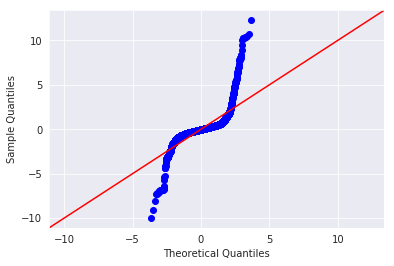

In [16]:
# Your code here
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

In [17]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

PatsyError: Error evaluating factor: NameError: name 'ages_10plus' is not defined
    list_price~piece_count+num_reviews+play_star_rating+star_rating+val_star_rating+ages_10plus+ages_10_14+ages_10_16+ages_10_21+ages_11_16+ages_12plus+ages_12_16+ages_14plus+ages_16plus+ages_1half_3+ages_2_5+ages_4plus+ages_5plus+ages_5_12+ages_6plus+ages_6_12+ages_7_12+ages_7_14+ages_8plus+ages_8_12+ages_8_14+ages_9plus+ages_9_12+ages_9_14+theme_name_Architecture+theme_name_BOOST+theme_name_Blues_Helicopter_Pursuit+theme_name_BrickHeadz+theme_name_Carnotaurus_Gyrosphere_Escape+theme_name_City+theme_name_Classic+theme_name_Creator_Expert+theme_name_DC_Comics_Super_Heroes+theme_name_DIMENSIONS+theme_name_Dilophosaurus_Outpost_Attack+theme_name_Disney+theme_name_Ghostbusters+theme_name_Ideas+theme_name_Indoraptor_Rampage_at_Lockwood_Estate+theme_name_MINDSTORMS+theme_name_Marvel_Super_Heroes+theme_name_Minecraft+theme_name_Minifigures+theme_name_NINJAGO+theme_name_SERIOUS_PLAY+theme_name_Star_Wars+theme_name_Stygimoloch_Breakout+theme_name_T_rex_Transport+theme_name_THE_LEGO_BATMAN_MOVIE+theme_name_THE_LEGO_NINJAGO_MOVIE+country_BE+country_CA+country_CZ+country_DE+country_DN+country_ES+country_FI+country_FR+country_LU+country_NL+country_NO+country_NZ+country_PL+country_PT+country_US+review_difficulty_Average+review_difficulty_Challenging+review_difficulty_Very_Challenging
                                                                                    ^^^^^^^^^^^

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the list_price increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confiding the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least 2 additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

In [ ]:
#Your code here

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches and make ongoing refinements. These choices depend on the context and specific use cases. 